# Лабораторная работа 2

### Описание датасета

Эти данные являются характеристиками красного вина. Набор данных загружается из репозитория машинного обучения UCI. В нём 1599 записей и 12 атрибутов.

Attribute Information:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol
 
Output variable (based on sensory data):
 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET = pd.read_csv('../02/winequality-red.csv')

In [3]:
DATASET.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


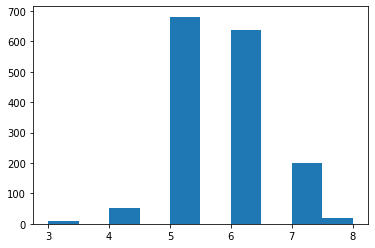

In [4]:
quality = DATASET['quality'].sort_values().values
plt.hist(quality)
plt.show()


In [5]:
DS_PROCESSED = DATASET.copy()

In [6]:
min_ = DS_PROCESSED.min()
max_ = DS_PROCESSED.max()
mean_ = DS_PROCESSED.mean()
std_ = DS_PROCESSED.std()
nulls = DS_PROCESSED.isnull().sum()
stats = pd.DataFrame({'Пропуски': nulls, 'Мин.': min_, 'Макс.': max_, 'Средн.': mean_, 'Ст. откл.': std_})
stats

,Пропуски,Мин.,Макс.,Средн.,Ст. откл.
fixed acidity,0,4.60000,15.90000,8.319637,1.741096
volatile acidity,0,0.12000,1.58000,0.527821,0.179060
citric acid,0,0.00000,1.00000,0.270976,0.194801
residual sugar,0,0.90000,15.50000,2.538806,1.409928
chlorides,0,0.01200,0.61100,0.087467,0.047065
free sulfur dioxide,0,1.00000,72.00000,15.874922,10.460157
total sulfur dioxide,0,6.00000,289.00000,46.467792,32.895324
density,0,0.99007,1.00369,0.996747,0.001887
pH,0,2.74000,4.01000,3.311113,0.154386
sulphates,0,0.33000,2.00000,0.658149,0.169507


In [7]:
DS_PROCESSED = DATASET.copy()

In [8]:
DS_PROCESSED.corr()['quality'].sort_values().to_frame()

,quality
volatile acidity,-0.390558
total sulfur dioxide,-0.185100
density,-0.174919
chlorides,-0.128907
pH,-0.057731
free sulfur dioxide,-0.050656
residual sugar,0.013732
fixed acidity,0.124052
citric acid,0.226373
sulphates,0.251397


In [9]:
from sklearn.model_selection import train_test_split

FEATURE_LABELS = ['alcohol', 'sulphates', 'citric acid','fixed acidity', 'residual sugar']
FEATURES = DS_PROCESSED[FEATURE_LABELS]
TARGET = DS_PROCESSED['quality']


X_train, X_test, Y_train, Y_test = train_test_split(FEATURES, TARGET, test_size = 0.4)

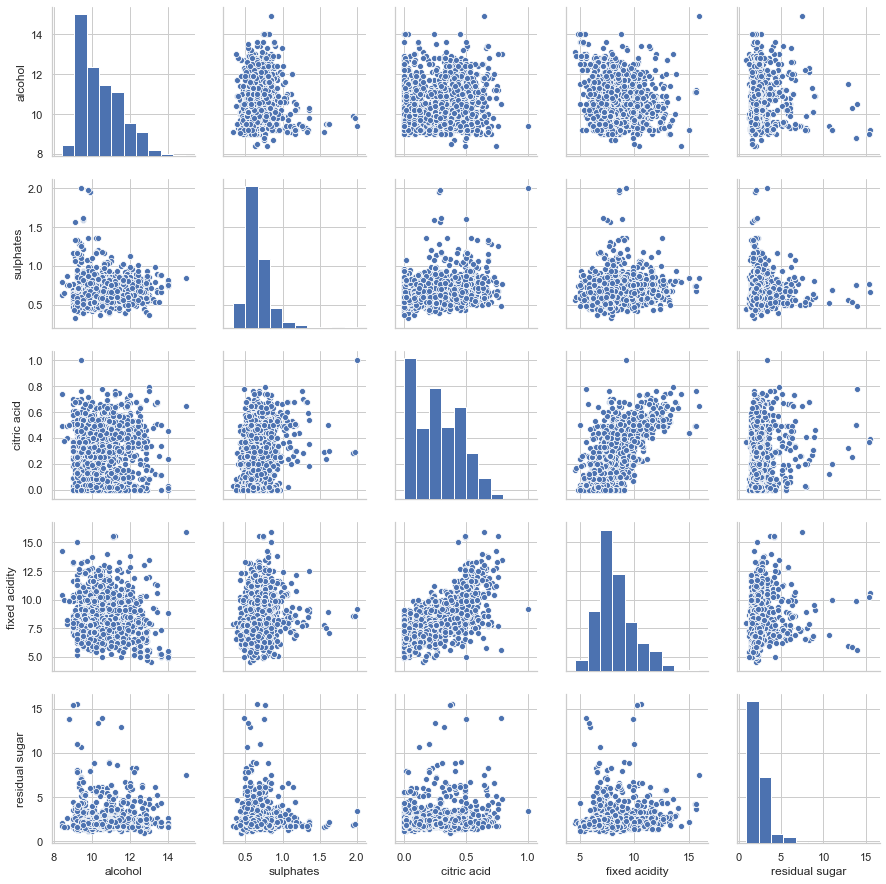

In [10]:
import seaborn as sns
sns.set(style= 'whitegrid', context = 'notebook')
sns.pairplot(FEATURES , height=2.5)
plt.show()

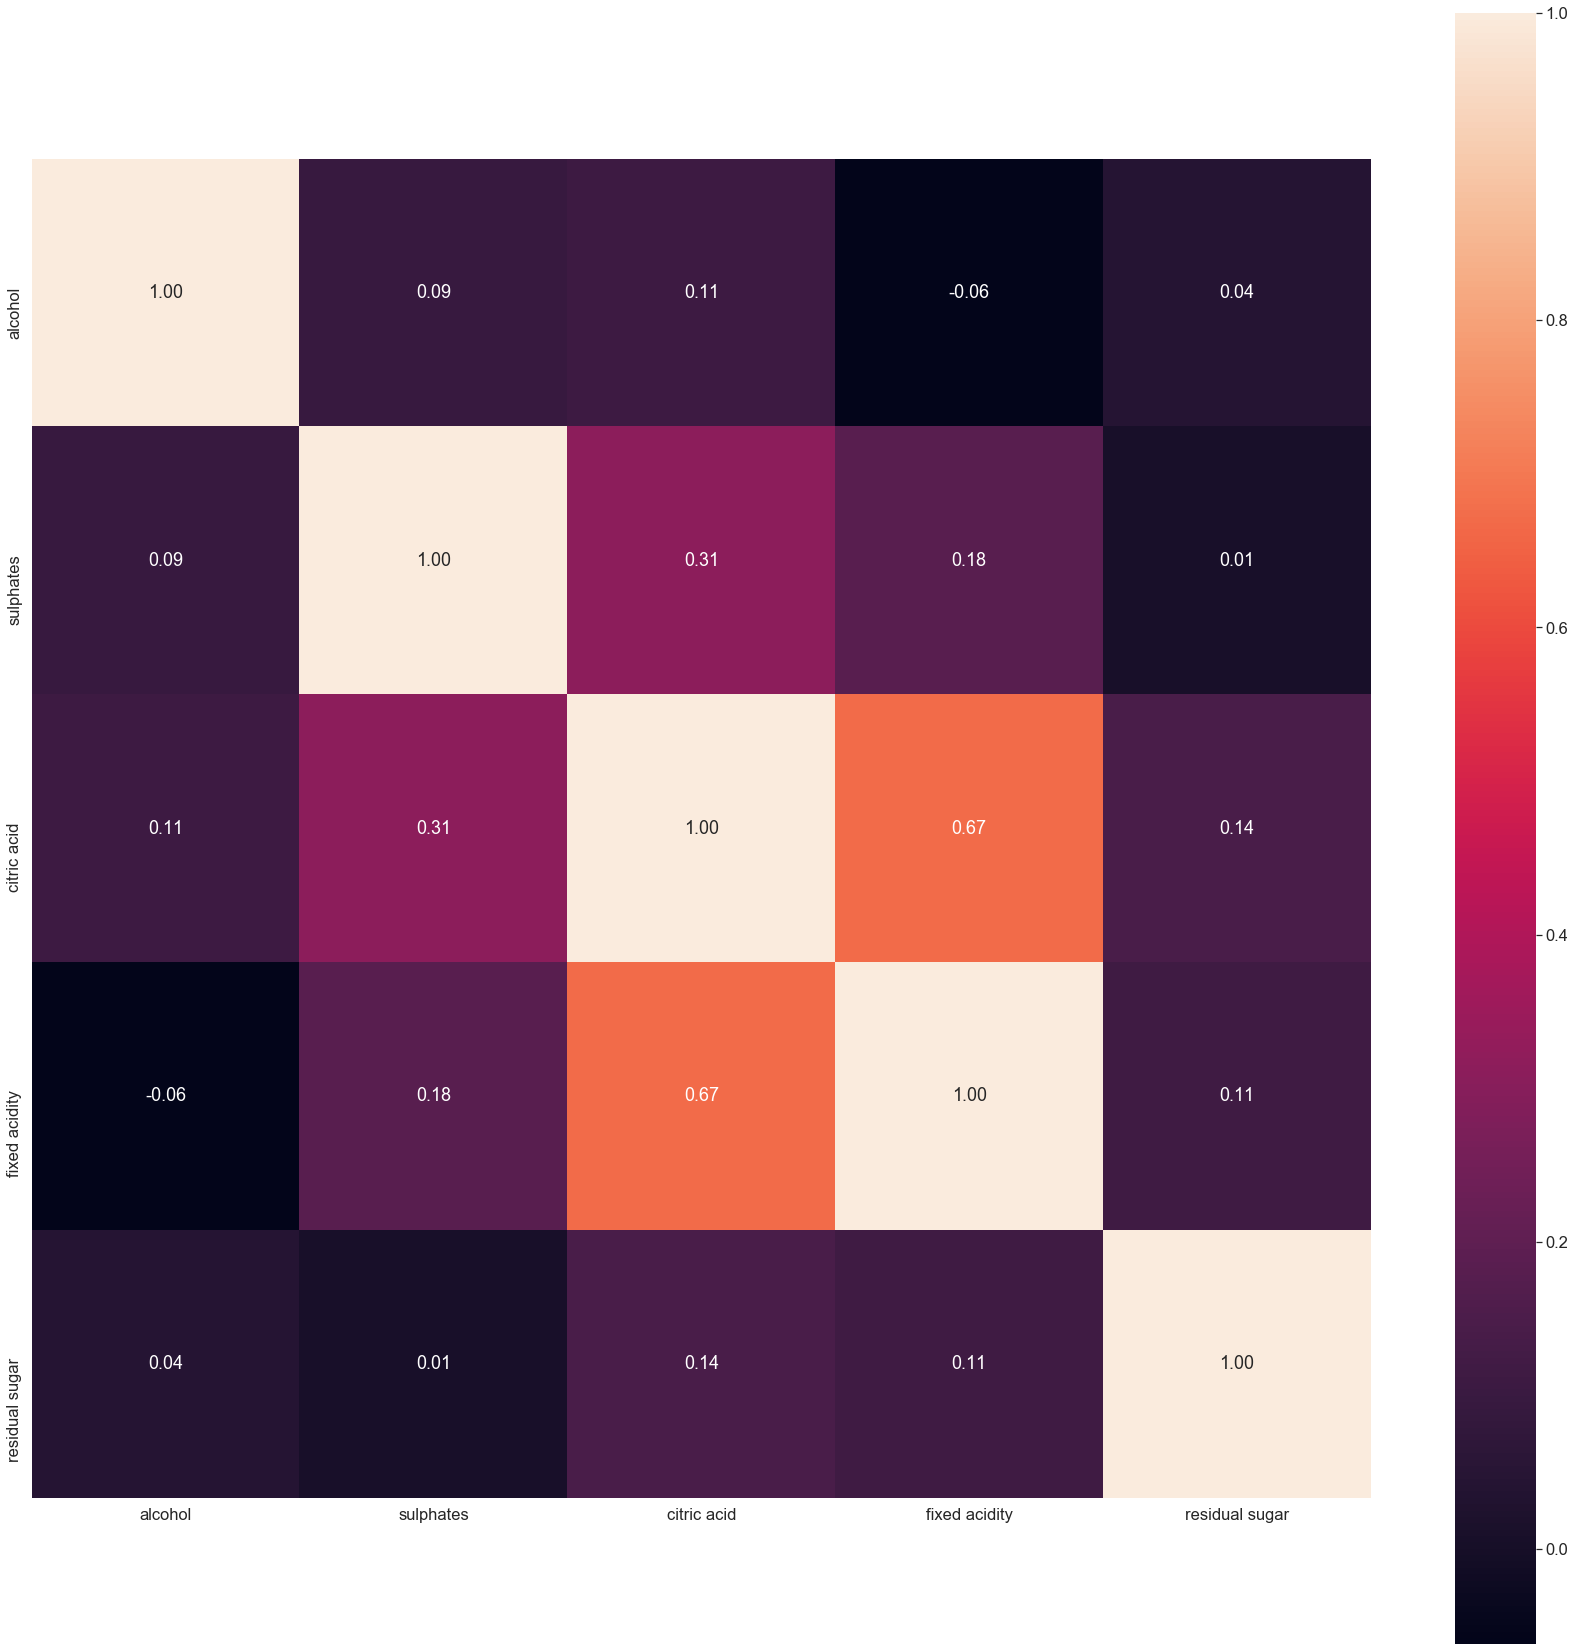

In [11]:
cm = np.corrcoef(FEATURES.values.T)
sns.set(font_scale=1.5)
_, ax = plt.subplots(figsize=(30, 30))
hm = sns.heatmap(cm, annot=True, cbar=True, square=True, fmt='.2f', ax=ax, xticklabels=FEATURE_LABELS, yticklabels=FEATURE_LABELS)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(Y_pred, Y):
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    print(f'MSE = {mse}')
    print(f'R2 = {r2}')

## Линейная регрессия

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear = LinearRegression().fit(X_train, Y_train)

In [15]:
evaluate_model(linear.predict(X_test), Y_test)

MSE = 0.44006167307081745
R2 = 0.28472231520836666


## Полиномиальные регрессия

In [16]:
from sklearn.preprocessing import PolynomialFeatures

def train_polynomial(degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    polynomial = LinearRegression().fit(X_train_poly, Y_train)
    return polynomial_features, polynomial

In [17]:
polynomial_features, polynomial = train_polynomial(degree=2)
X_test_poly = polynomial_features.fit_transform(X_test)
evaluate_model(polynomial.predict(X_test_poly), Y_test)

MSE = 0.45340124814707705
R2 = 0.26304012618683903


In [18]:
polynomial_features, polynomial = train_polynomial(degree=3)
X_test_poly = polynomial_features.fit_transform(X_test)
evaluate_model(polynomial.predict(X_test_poly), Y_test)

MSE = 0.44557784843998877
R2 = 0.2757563056955805


In [19]:
polynomial_features, polynomial = train_polynomial(degree=4)
X_test_poly = polynomial_features.fit_transform(X_test)
evaluate_model(polynomial.predict(X_test_poly), Y_test)

MSE = 1.9240836606379819
R2 = -2.127411884163498


## Случайный лес

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
FEATURES = DS_PROCESSED.loc[:, DS_PROCESSED.columns != 'quality']
TARGET = DS_PROCESSED['quality']

In [22]:
forest = RandomForestRegressor(n_estimators=10).fit(FEATURES, TARGET)

In [23]:
def print_importance(forest, columns):
    df = pd.DataFrame(
            zip(
                forest.feature_importances_.round(decimals=4),
                columns
            ),
            columns = ['importance', 'feature']
        ).sort_values('importance', ascending=False)
    return df

In [24]:
print_importance(forest, FEATURES.columns).head()

,importance,feature
10,0.2805,alcohol
9,0.1446,sulphates
1,0.1252,volatile acidity
6,0.0766,total sulfur dioxide
4,0.0628,chlorides


In [31]:
FEATURES = DS_PROCESSED[['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'citric acid']]
TARGET = DS_PROCESSED['quality']
X_train, X_test, Y_train, Y_test = train_test_split(FEATURES, TARGET, test_size = 0.4)

In [32]:
n_estimators = [2, 5, 10, 20, 50, 100, 200, 500]

In [34]:
for n in n_estimators:
    print(f'\n{n} estimators')
    forest = RandomForestRegressor(n_estimators=n).fit(X_train, Y_train)
    evaluate_model(forest.predict(X_test), Y_test)


2 estimators
MSE = 0.57734375
R2 = 0.1190287261903431

5 estimators
MSE = 0.44212500000000005
R2 = 0.3253595896152083

10 estimators
MSE = 0.423046875
R2 = 0.35447098136951394

20 estimators
MSE = 0.41531250000000003
R2 = 0.36627289694558374

50 estimators
MSE = 0.397635
R2 = 0.3932470690792047

100 estimators
MSE = 0.39181609375000004
R2 = 0.40212616277553626

200 estimators
MSE = 0.3858859375
R2 = 0.4111750133181339

500 estimators
MSE = 0.39185013750000003
R2 = 0.40207421527319864
